### Bibliotecas utilizadas

In [1]:
import osmnx as ox
import geoplot as gplt
import geopandas as gpd
import pandas as pd
from shapely import wkt
import os

### Criar variável da localidade onde se pretende realizar a consulta

In [2]:
localidade_nome = 'São Paulo, BR'

### Criar variável com o tipo de estabelecimento que se pretende realizar a consulta

In [3]:
tags = {'building': 'supermarket'} 

### Realizar consulta

In [4]:
varejo_alimentar = ox.geometries_from_place(localidade_nome, tags)
varejo_alimentar.head()

geometry  \
element_type osmid                                                         
way          17555181  POLYGON ((-46.71070 -23.62891, -46.71078 -23.6...   
             37253281  POLYGON ((-46.58067 -23.53704, -46.58066 -23.5...   
             38360255  POLYGON ((-46.67088 -23.52735, -46.67101 -23.5...   
             60723580  POLYGON ((-46.62074 -23.58840, -46.62076 -23.5...   
             93289091  POLYGON ((-46.50988 -23.58820, -46.50951 -23.5...   

                      access amenity                 name  addr:city  \
element_type osmid                                                     
way          17555181    NaN     NaN            Carrefour        NaN   
             37253281    NaN     NaN                  NaN        NaN   
             38360255    NaN     NaN   Supermercado Sonda        NaN   
             60723580    NaN     NaN        Pão de Açúcar  São Paulo   
             93289091    NaN     NaN  Supermecardo Naguno  São Paulo   

                      addr:housenumber addr:postcode  \
element_type osmid                                     
way          17555181              NaN           NaN   
             37253281              NaN     03076-000   
             38360255              NaN           NaN   
             60723580              NaN           NaN   
             93289091             2905     03916-000   

                                        addr:street    addr:suburb parking  \
element_type osmid                                                           
way          17555181     Avenida das Nações Unidas            NaN     NaN   
             37253281     Avenida Salim Farah Maluf            NaN     NaN   
             38360255                           NaN            NaN     NaN   
             60723580  Avenida Doutor Ricardo Jafet            NaN     NaN   
             93289091    Avenida da Barreira Grande  Vila Bancária     NaN   

                       ... short_name loc_name note reg_name layer addr:state  \
element_type osmid     ...                                                      
way          17555181  ...        NaN      NaN  NaN      NaN   NaN        NaN   
             37253281  ...        NaN      NaN  NaN      NaN   NaN        NaN   
             38360255  ...        NaN      NaN  NaN      NaN   NaN        NaN   
             60723580  ...        NaN      NaN  NaN      NaN   NaN        NaN   
             93289091  ...        NaN      NaN  NaN      NaN   NaN        NaN   

                      contact:phone contact:email surface start_date  
element_type osmid                                                    
way          17555181           NaN           NaN     NaN        NaN  
             37253281           NaN           NaN     NaN        NaN  
             38360255           NaN           NaN     NaN        NaN  
             60723580           NaN           NaN     NaN        NaN  
             93289091           NaN           NaN     NaN        NaN  

[5 rows x 46 columns]

### Resultado da consulta no limite do município de São Paulo

<AxesSubplot:>

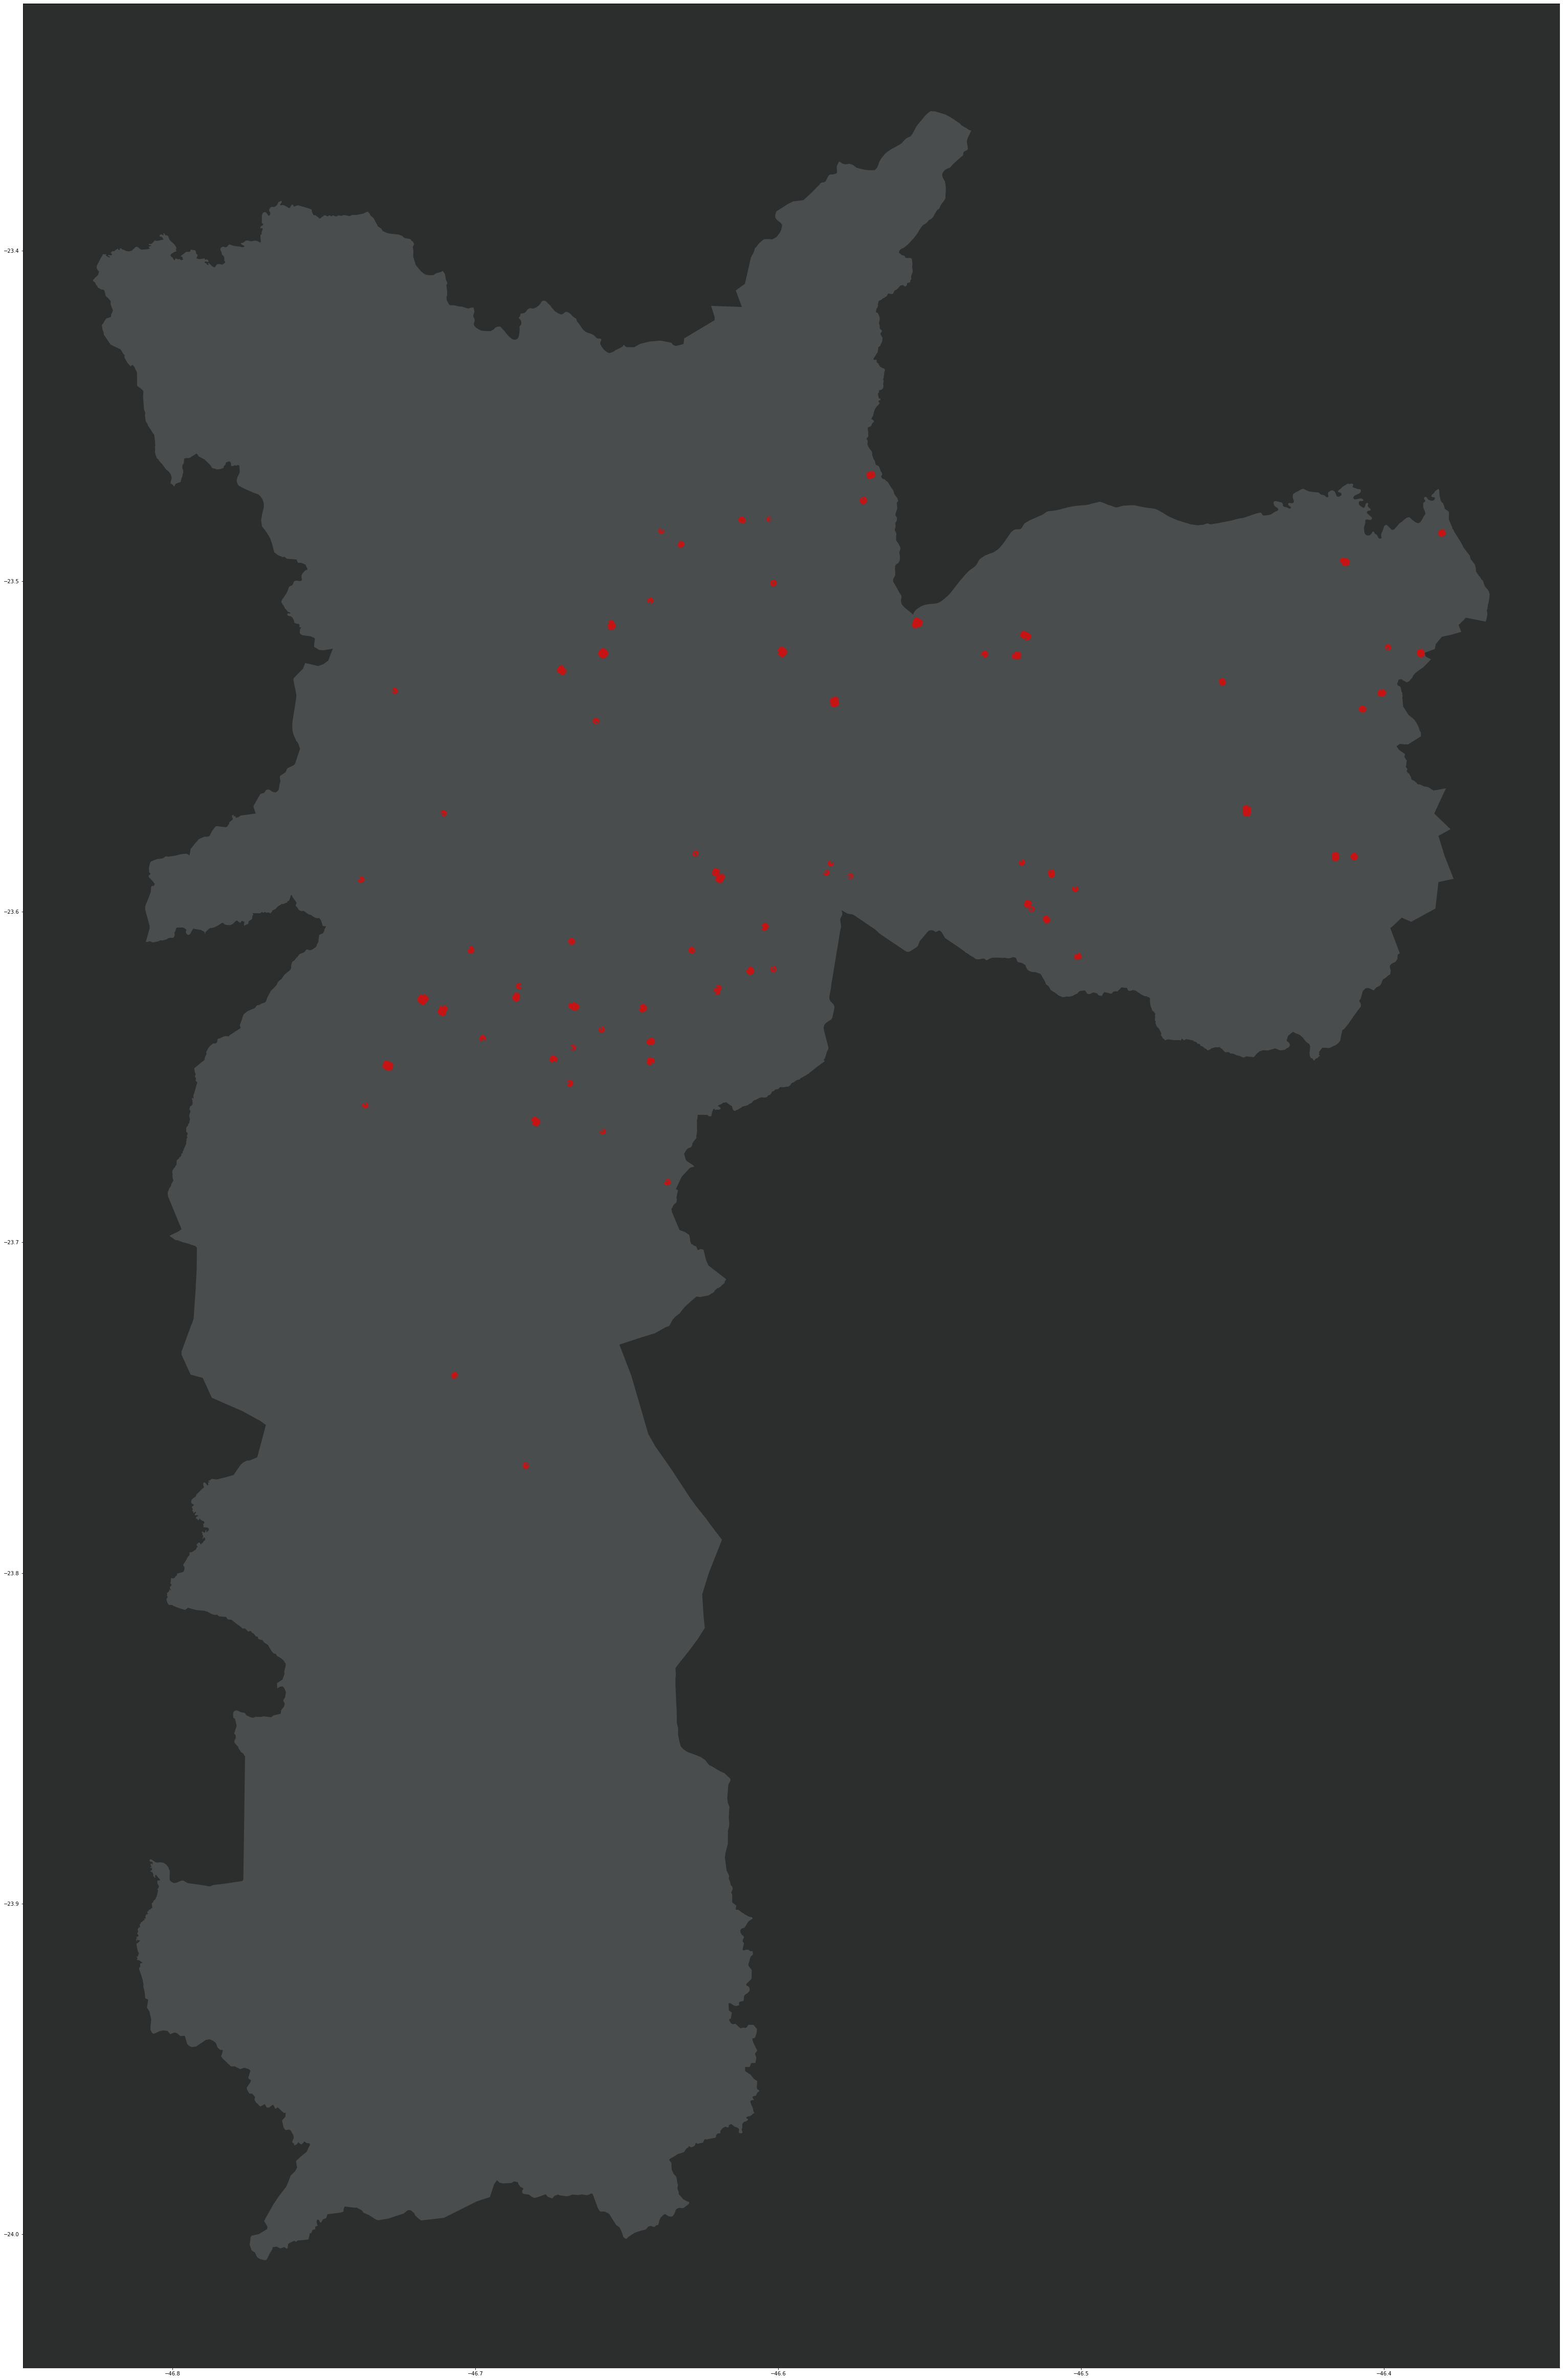

In [5]:
limite_municipio = ox.geocoder.geocode_to_gdf(localidade_nome, which_result=2)
ax = limite_municipio.plot(facecolor = '#494D4D', figsize=(85,85))
ax.set_facecolor('#2C2E2E')
varejo_alimentar['geometry'].plot(facecolor = '#C61313',
                             edgecolor = '#C61313',
                             linewidth = 10,
                             markersize = 1,
                             ax = ax)

### Criar pasta Resultado no C:


In [6]:
os.mkdir('C:/Resultado')
pasta_dados = 'C:/Resultado'

### Exportação de planilha a partir do Pandas

In [7]:
planilha = "C:/Resultado/Planilha.csv"
df = pd.DataFrame(varejo_alimentar, copy = True)
df.to_csv(planilha, index = True)

### Identificação da coluna de geometria na planilha

In [8]:
leitura_arquivo = pd.read_csv(planilha)
leitura_arquivo['geometry'] = gpd.GeoSeries.from_wkt(leitura_arquivo['geometry'])

### Identificação do sistema de referência

In [9]:
gdf = gpd.GeoDataFrame(leitura_arquivo,geometry='geometry')
gdf.crs

### Inserção do sistema de referência no geodataframe

In [10]:
insercao_referencia_espacial = gdf.set_crs(epsg=4674)
insercao_referencia_espacial.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Exportação do dado para shapefile

In [11]:
insercao_referencia_espacial.to_file('C:/Resultado/dado_geoespacial.shp')

C:\Users\felip\Anaconda3\envs\OpenStreetMap\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.
